In [27]:
#Import necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
#reading the input and displaying the first five values
s_df = pd.read_csv("C:/Users/jayan/Downloads/healthcare-dataset-stroke-data.csv")
s_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Displaying the column names
s_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
# Identify columns with missing values
missing_columns = s_df.columns[s_df.isnull().any()]

# Print the column names with missing values
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
Index(['bmi'], dtype='object')


In [16]:
# Count the number of missing values in each column
missing_count = s_df.isnull().sum()

# Filter to only show columns with missing values
missing_count = missing_count[missing_count > 0]

# Print the column names and their missing value counts
print("Columns with missing values and their counts:")
print(missing_count)


Columns with missing values and their counts:
bmi    201
dtype: int64


In [19]:
# Impute with median
s_df['bmi'].fillna(s_df['bmi'].median(), inplace=True)

# View the first few rows of the DataFrame to confirm the changes
print(s_df.head())

  


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [20]:
# check if there are any remaining missing values in the BMI column
print(s_df['bmi'].isnull().sum())

0


Class Distribution:
0    4861
1     249
Name: stroke, dtype: int64


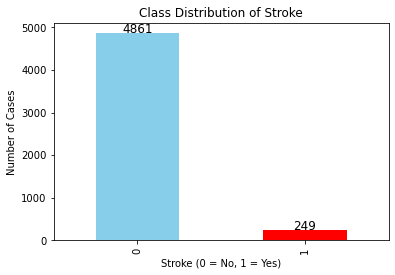

In [25]:
# Assuming 'stroke' is the target variable column in your DataFrame
class_distribution = s_df['stroke'].value_counts()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)

# If you want to visualize the distribution as well, you can use a bar plot
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['skyblue', 'red'])
plt.title('Class Distribution of Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Number of Cases')

# Annotate the count on top of each bar
for index, value in enumerate(class_distribution):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)
    
plt.show()


In [26]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

#s_df is your DataFrame
columns_to_encode = ['gender', 'work_type', 'smoking_status'] 

# Initialize the encoder, drop='first' to avoid multicollinearity
encoder = OneHotEncoder(drop='first', sparse_output=False)  

# Fit and transform the selected columns
encoded_columns = encoder.fit_transform(s_df[columns_to_encode])

# Convert to DataFrame for easier merging
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

# Merge the encoded columns back into the original DataFrame
s_df = s_df.drop(columns_to_encode, axis=1)  
s_df = pd.concat([s_df, encoded_df], axis=1)  

print(s_df.head())  # View the updated DataFrame


      id   age  hypertension  heart_disease ever_married Residence_type  \
0   9046  67.0             0              1          Yes          Urban   
1  51676  61.0             0              0          Yes          Rural   
2  31112  80.0             0              1          Yes          Rural   
3  60182  49.0             0              0          Yes          Urban   
4   1665  79.0             1              0          Yes          Rural   

   avg_glucose_level   bmi  stroke  gender_Male  gender_Other  \
0             228.69  36.6       1          1.0           0.0   
1             202.21  28.1       1          0.0           0.0   
2             105.92  32.5       1          1.0           0.0   
3             171.23  34.4       1          0.0           0.0   
4             174.12  24.0       1          0.0           0.0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                     0.0                1.0                      0.0   
1           

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#s_df is your DataFrame
columns_to_encode = ['ever_married', 'Residence_type']

# Initialize the encoder, drop='first' to avoid multicollinearity
encoder = OneHotEncoder(drop='first', sparse_output=False)  

# Fit and transform the selected columns
encoded_columns = encoder.fit_transform(s_df[columns_to_encode])

# Convert to DataFrame for easier merging
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

# Merge the encoded columns back into the original DataFrame
s_df = s_df.drop(columns_to_encode, axis=1)  
s_df = pd.concat([s_df, encoded_df], axis=1)  

# Step 1: Split the data into features and target variable
X = s_df.drop('stroke', axis=1)  # Features
y = s_df['stroke']  # Target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Normalize the data after oversampling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)  # Apply the same transformation to the test set

# Check the class distribution after SMOTE
class_distribution_after_smote = y_train_smote.value_counts()

# Return the first few rows of the normalized training data
normalized_output = pd.DataFrame(X_train_scaled, columns=X_train.columns).head()

print("Class Distribution After SMOTE:\n", class_distribution_after_smote)
print("\nFirst 5 Rows of Normalized Training Data:\n", normalized_output)


Class Distribution After SMOTE:
 0    3889
1    3889
Name: stroke, dtype: int64

First 5 Rows of Normalized Training Data:
          id       age  hypertension  heart_disease  avg_glucose_level  \
0 -0.556082 -0.315632     -0.311012      -0.216419          -0.988570   
1  0.285832 -1.862743     -0.311012      -0.216419           0.073872   
2  0.440015  0.575129     -0.311012      -0.216419          -0.163094   
3  0.890974 -0.503160     -0.311012      -0.216419          -1.064688   
4 -0.508535 -1.909625     -0.311012      -0.216419          -0.725564   

        bmi  gender_Male  gender_Other  work_type_Never_worked  \
0  0.543216    -0.926990      -0.01134               -0.040917   
1 -1.303313     1.281576      -0.01134               -0.040917   
2 -0.708151    -0.926990      -0.01134               -0.040917   
3 -0.723411     1.281576      -0.01134               -0.040917   
4  0.314307     1.281576      -0.01134               -0.040917   

   work_type_Private  work_type_Self-emp

Class Distribution after SMOTE:
0    3889
1    3889
Name: stroke, dtype: int64


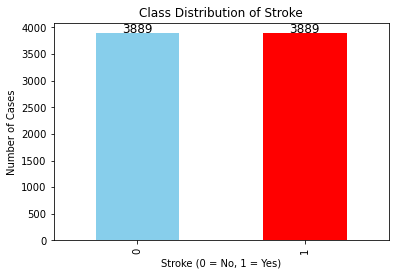

In [65]:
# Assuming 'stroke' is the target variable column in your DataFrame
class_distribution = y_train_smote.value_counts()

# Print the class distribution
print("Class Distribution after SMOTE:")
print(class_distribution)

# To visualize the distribution as well, you can use a bar plot
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['skyblue', 'red'])
plt.title('Class Distribution of Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Number of Cases')

# Annotate the count on top of each bar
for index, value in enumerate(class_distribution):
    plt.text(index, value + 10, str(value), ha='center', fontsize=12)
    
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Step 1: Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Step 2: Train the model
logistic_model.fit(X_train_scaled, y_train_smote)

# Step 3: Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7681
Precision: 0.1418
Recall: 0.7400
F1-Score: 0.2379
ROC-AUC: 0.8147
Confusion Matrix:
[[748 224]
 [ 13  37]]


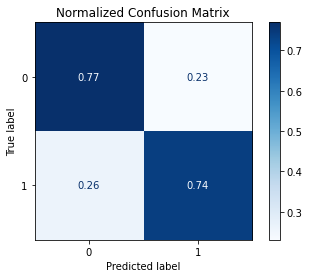

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by the number of true instances in each class
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Display the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.show()


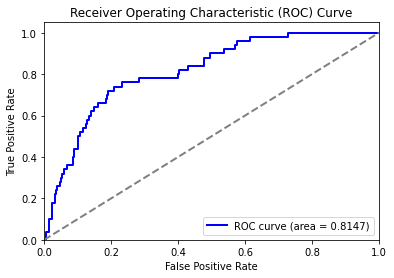

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (chance level)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


GBM Accuracy: 0.7456
GBM Precision: 0.1277
GBM Recall: 0.7200
GBM F1-Score: 0.2169
GBM ROC-AUC: 0.7898


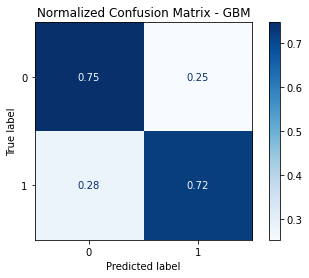

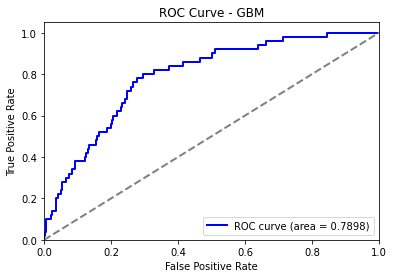

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt

# Step 1: Initialize the Gradient Boosting model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Calculate class weights manually
class_weights = {0: 1, 1: 10}  

# Create sample weights
sample_weight = np.array([class_weights[y] for y in y_train_smote])

# Step 2: Train the model with sample weights
gbm_model.fit(X_train_scaled, y_train_smote, sample_weight=sample_weight)

# Step 3: Make predictions on the test set
y_pred_gbm = gbm_model.predict(X_test_scaled)
y_pred_gbm_proba = gbm_model.predict_proba(X_test_scaled)[:, 1]

# Step 4: Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_pred_gbm_proba)

print(f"GBM Accuracy: {accuracy_gbm:.4f}")
print(f"GBM Precision: {precision_gbm:.4f}")
print(f"GBM Recall: {recall_gbm:.4f}")
print(f"GBM F1-Score: {f1_gbm:.4f}")
print(f"GBM ROC-AUC: {roc_auc_gbm:.4f}")

# Confusion Matrix
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Normalize the confusion matrix
conf_matrix_gbm_normalized = conf_matrix_gbm.astype('float') / conf_matrix_gbm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gbm_normalized, display_labels=gbm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix - GBM")
plt.show()

# Plot ROC Curve
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred_gbm_proba)
plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_gbm:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GBM')
plt.legend(loc='lower right')
plt.show()


SVM Accuracy: 0.7495
SVM Precision: 0.1321
SVM Recall: 0.7400
SVM F1-Score: 0.2242
SVM ROC-AUC: 0.8107


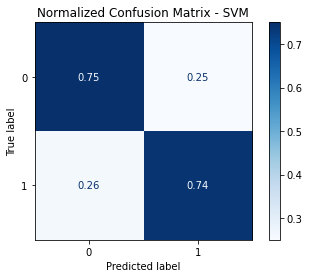

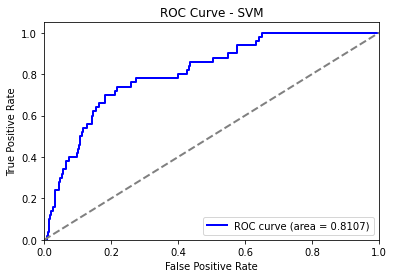

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt

# Step 1: Initialize the SVM model with a linear kernel and probability=True to enable probability estimates
svm_model = SVC(kernel='linear', probability=True, random_state=42, class_weight='balanced')

# Step 2: Train the model
svm_model.fit(X_train_scaled, y_train_smote)

# Step 3: Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Step 4: Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm_proba)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1-Score: {f1_svm:.4f}")
print(f"SVM ROC-AUC: {roc_auc_svm:.4f}")

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Normalize the confusion matrix
conf_matrix_svm_normalized = conf_matrix_svm.astype('float') / conf_matrix_svm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm_normalized, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix - SVM")
plt.show()

# Plot ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()
